# Maximal Margin Classifier (59)

Main Idea of Support Vector Machines (SVMs): **We try to find a hyperplane that separates the classes in feature space**.

### Hyperplane

* A hyperplane in $p$ dimensions is a flat affine subspace of dimension $p-1$
* Has the following form: $$\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p = 0 $$
* If $\beta_0 = 0$, the hyperplane goes through the origin, otherwise not.
* The vector $\beta = (\beta_1, \beta_2, ..., \beta_p)$ is the normal vector, pointing orthogonal to the hyperplane
* $f(X) > 0$ defines one side of the hyperplane and $f(X) < 0$ defines the other. 
* The goal is to find the one that creats the biggest gap between two classes s.t. $$ \max_{\beta_0, ..., \beta_p} M \text{ s.t.}  \sum_{j=1}^{p}\beta_{j}^2 = 1, $$ $$ y_i(\beta_0 + \beta_1x_{i1} + ... + \beta_px_{ip}) \ge M \text{ for all } i = 1, ..., N $$

# Support Vector Classifier (60)

What if the data is unseparable? We need SVMs with a **soft margin**.

$$ \max_{\beta_0,...,\beta_p, \epsilon_1,...,\epsilon_n} M \text{ s.t. } \sum_{j=1}^p \beta_j^2 = 1, $$

$$y_i(\beta_0 + \beta_1x_{i1} + ... + \beta_px_{ip}) \ge M(1 - \epsilon_i), $$

$$ \epsilon_i \ge 0, \sum_{i = 1}^n \epsilon_i \le C, $$

* $\epsilon$ is the **slack** you give to create the **soft margin**.

What if you have non-linear classifiers?

# Kernels and Support Vector Machines (61)

### Feature Expansion

* Enlarge the space of features by including transformations; e.g. $X_1^2, X_1^3, X_1X_2, X_1X_2^2, ...$. Hence go from a p-dimensional space to a M > p dimensional space

### Nonlinearities and Kernels

* Polynomials (esp. high-dimensional ones) get wild rather fast.
* There is a more elegant and controlled way to introduce nonlinearities in support vector classifiers, through **kernels**. But first we need to understand **inner products**

### Inner Products

$$ \langle x_i, x_{i'} \rangle = \sum_{j=1}^p x_{ij}x_{i'j} $$

* The linear support vector classifier can be represented as:

$$ f(x) = \beta_0 + \sum_{i=1}^n \alpha_i \langle x_i, x_{i'} \rangle $$

* To estimate the parameters $\alpha_1, ..., \alpha_n$ and $\beta_0$, we need are the $ n \choose 2 $ inner products $\langle x_i, x_{i'} \rangle$ between all pairs of training observations.
* It turns out that most of the $\hat{\alpha}_i$ can be zero: $$ f(x) = \beta_0 + \sum_{i \in S} \hat{\alpha}_i \langle x_i, x_{i'} \rangle $$
* $S$ is the **support set** of indices $i$ s.t. $\hat{\alpha}_i > 0$.

### Kernels

If we can compute inner-products between observations, we can fit a SC classifier. Can be quite abstract! Some special **kernal functions** can do this, e.g.

$$ K(x_i, x_{i'}) = \bigg( 1 + \sum_{j=1}^p x_{ij}x_{i'j} \bigg) ^ d $$

computes the inner-products needed for d dimensional polynomials - $ p + d \choose d$ basis functions.

Solution has form:

$$f(x) = \beta_0 + \sum_{i \in S} \hat{\alpha}_i K (x, x_i)$$

### Radial Kernel (most popular kernel)

$$ K(x_i, x_{i'}) = \exp(-\gamma \sum_{j=1}^p (x_{ij} - x_{i'j})^2) $$

$$ f(x) = \beta_0 + \sum_{i \in S} \hat{\alpha}_i K(x, x_i) $$

Even though it's an infinite dimension feature space, you are not overfitting because the dimensions are squashed down.
* $\gamma$ is a tuning parameter, in which big = small variance, small = more smooth variance

# Example and Comparison with Logistic Regression (62)

ROC curve is obtained by changing the threshold 0 to threshold t in $\hat{f}(x) > t$ and recording false position vs. true position rates as t varies.
* We see data in which large $\gamma$ SVMs do better

### More than 2 classes?

The SVM as defined works for K = 2 classes. What do we do if we have K > 2 classes?

* **OVA** (One versus All). Fit K different 2-class SVM classifiers $\hat{f}_k(x), k = 1, ..., K$. Each class versus the rest. Classify $x*$ to the class for which $\hat{f}_k(x*)$ is largest
* **OVO** (One versus One). Fit all $K \choose 2$ pairwise classifiers $\hat{f}_{kl}(x)$. Classify $x*$ to the class that iwns the most pairwise competitions.
* If K is not too large, use **OVO**

### SVM vs. Log Reg?

We can rephrase the SV classifer optimation as:

$$ \min_{\beta_0,..., \beta_p} \bigg\{ \sum_{i=1}^n \max[0, 1 - y_i f(x_i)] + \lambda \sum_{j=1}^p \beta_j^2 \bigg\} $$

Log reg has **soft margin** while SVM has **hard margin** in terms of **loss plus penalty**.

* When classes are (nearly) separably, SVM/LDA.
* When not, LR (with ridge penalty) and SVM very similar.
* If you want to estimate probability, LR is the choice.
* For nonlinear boundaries, kernel SVMs are popular and computationally cheap.

# R-Lab, SVM for Classification (63)

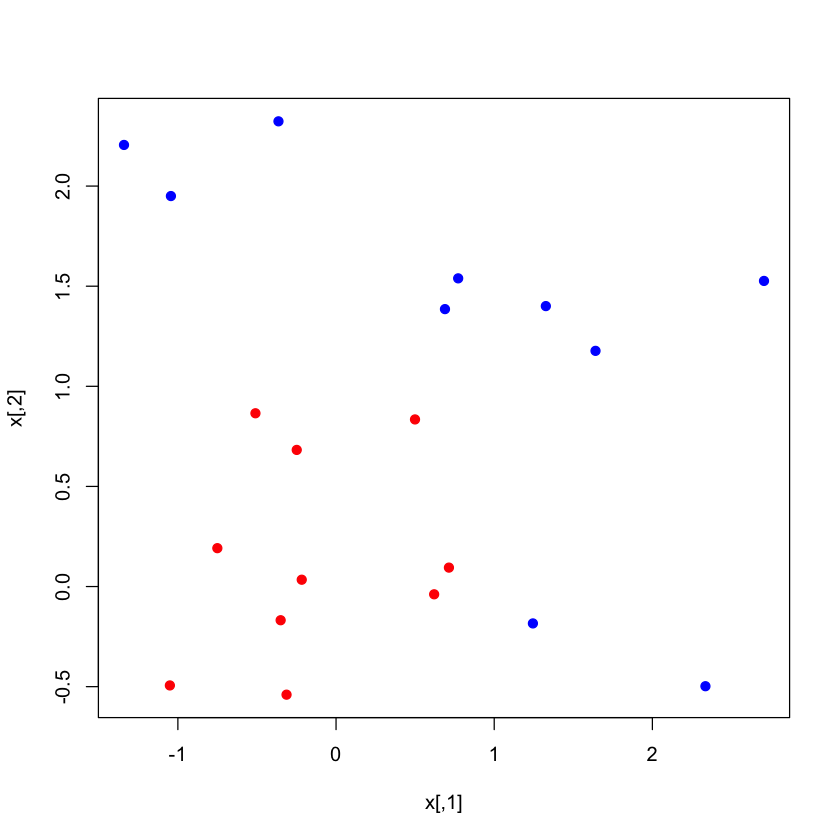

In [7]:
set.seed(10111)
x = matrix(rnorm(40), 20, 2)
y = rep(c(-1, 1), c(10, 10))
x[y == 1,] = x[y ==1, ] + 1
plot(x, col = y + 3, pch = 19)

In [11]:
library(e1071)
dat = data.frame(x, y = as.factor(y))
# turn y into a factor variable (1 or -1)
svmfit = svm(y~., data = dat, kernel = "linear", cost = 10, scale = FALSE)
print(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  6



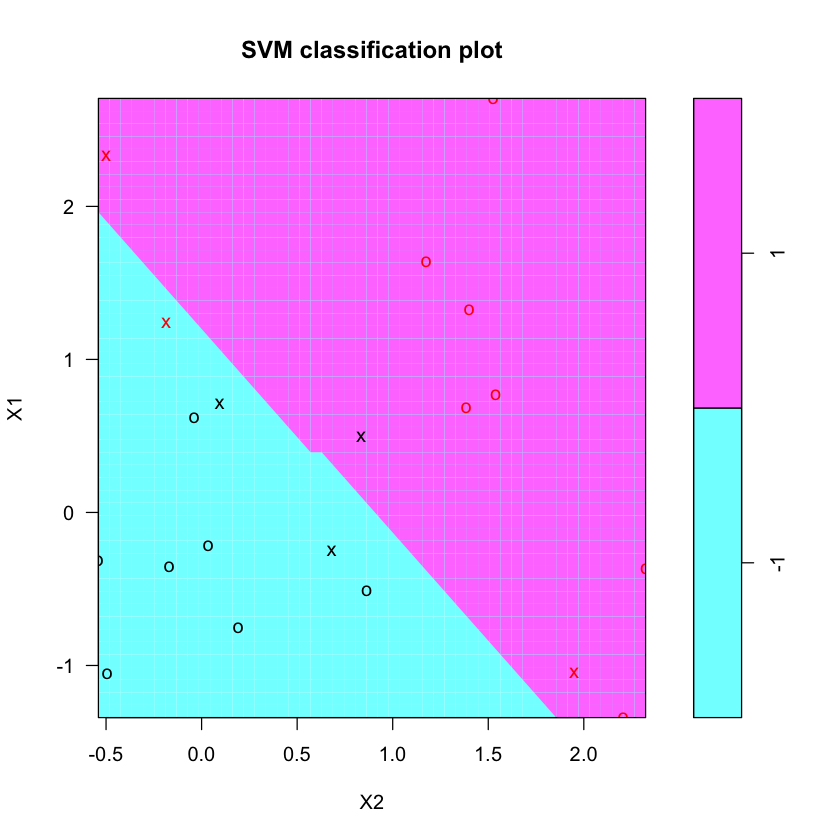

In [13]:
plot(svmfit, dat)
# ugly plot

In [15]:
make.grid = function(x, n = 75) {
    grange = apply(x, 2, range)
    x1 = seq(from = grange[1, 1], to = grange[2, 1], length = n)
    x2 = seq(from = grange[1, 2], to = grange[2, 2], length = n)
    expand.grid(X1 = x1, X2 = x2)
}
xgrid = make.grid(x)
xgrid[1:10,]

X1         X2
1  -1.3406379 -0.5400074
2  -1.2859572 -0.5400074
3  -1.2312766 -0.5400074
4  -1.1765959 -0.5400074
5  -1.1219153 -0.5400074
6  -1.0672346 -0.5400074
7  -1.0125540 -0.5400074
8  -0.9578733 -0.5400074
9  -0.9031927 -0.5400074
10 -0.8485120 -0.5400074

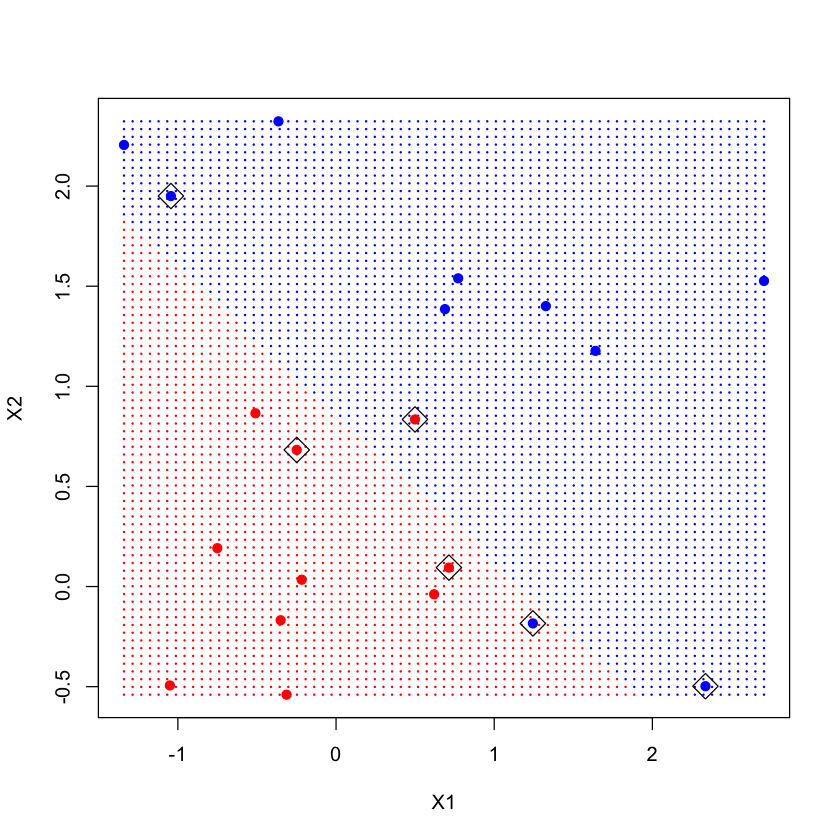

In [16]:
ygrid = predict(svmfit, xgrid)
plot(xgrid, col = c("red", "blue")[as.numeric(ygrid)]
    , pch = 20, cex = .2)
points(x, col = y + 3, pch = 19)
points(x[svmfit$index, ], pch = 5, cex = 2)

While the `svm` package isn't very user friendly. Let's get the coefficients of the svm.

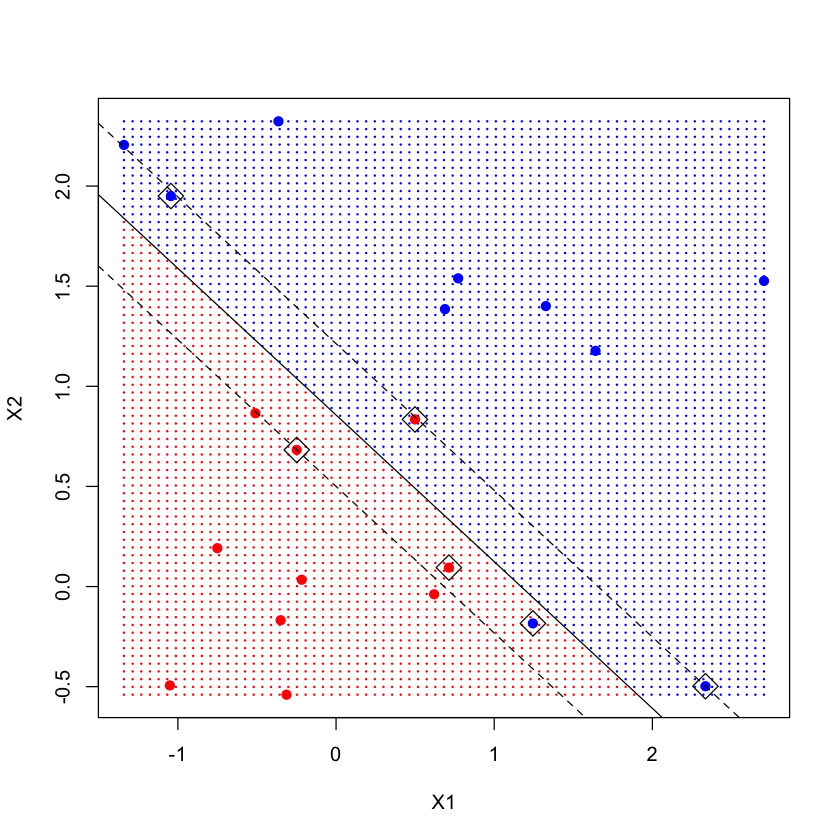

In [17]:
beta = drop(t(svmfit$coefs)%*%x[svmfit$index, ])
beta0 = svmfit$rho
plot(xgrid, col = c("red", "blue")[as.numeric(ygrid)]
    , pch = 20, cex = .2)
points(x, col = y + 3, pch = 19)
points(x[svmfit$index, ], pch = 5, cex = 2)
abline(beta0 / beta[2], -beta[1]/beta[2])
abline((beta0 - 1) / beta[2], - beta[1]/beta[2], lty = 2)
abline((beta0 + 1) / beta[2], - beta[1]/beta[2], lty = 2)

# R-Lab, Nonlinear SVM (64)

http://rpubs.com/hmwang/166477